# Using XGboost

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [42]:
data= pd.read_excel("/content/drive/MyDrive/Project(EPICS)/Datasets/PTB_FinalDataset.xlsx")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,"Target (Normal = 1, Abnormal = 0)"
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,1
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0,0,0,0,0,0,0,0,0,1
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0,0,0,0,0,0,0,0,0,1
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0,0,0,0,0,0,0,0,0,1
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0,0,0,0,0,0,0,0,0,1


In [43]:
data.shape

(14552, 188)

In [44]:
data.dtypes

,0
Unnamed: 0,float64
Unnamed: 1,float64
Unnamed: 2,float64
Unnamed: 3,float64
Unnamed: 4,float64
...,...
Unnamed: 183,object
Unnamed: 184,object
Unnamed: 185,object
Unnamed: 186,object


In [45]:
#extracts the cols with dtype= object
obj_cols=data.select_dtypes(include=["object"]).columns
obj_cols

Index(['Unnamed: 11', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 40', 'Unnamed: 42', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 52', 'Unnamed: 53',
       ...
       'Unnamed: 177', 'Unnamed: 178', 'Unnamed: 179', 'Unnamed: 180',
       'Unnamed: 181', 'Unnamed: 182', 'Unnamed: 183', 'Unnamed: 184',
       'Unnamed: 185', 'Unnamed: 186'],
      dtype='object', length=138)

In [46]:
# removing duplicate rows
data.drop_duplicates(inplace=True)

In [47]:
#changing the object dtype to numeric
for col in obj_cols:
  data[col]= pd.to_numeric(data[col], errors= 'coerce')
  #changes the unconvertable data to NaN


In [48]:
# verification of the changes
data.select_dtypes(include=["object"]).columns

Index([], dtype='object')

In [49]:
data.isnull().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
Unnamed: 4,0
...,...
Unnamed: 183,2
Unnamed: 184,2
Unnamed: 185,2
Unnamed: 186,2


In [50]:
# removing of rows with null values
data=data.dropna(how='any')
data.isnull().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
Unnamed: 4,0
...,...
Unnamed: 183,0
Unnamed: 184,0
Unnamed: 185,0
Unnamed: 186,0


In [51]:
# cheching mean of each column with respect to categories
data.groupby("Target (Normal = 1, Abnormal = 0)").mean()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
"Target (Normal = 1, Abnormal = 0)",,,,,,,,,,,,,,,,,,,,,
0,0.975491,0.725444,0.438123,0.290198,0.252712,0.249284,0.245564,0.247082,0.250138,0.252338,...,0.001147,0.001055,0.001057,0.000745,0.000554,0.000534,0.000314,0.000070,0.000074,0.0
1,0.979677,0.711385,0.311688,0.119613,0.088640,0.130871,0.159671,0.165626,0.168028,0.170806,...,0.002152,0.001540,0.001332,0.001304,0.001220,0.000992,0.000895,0.000454,0.000474,0.0


In [52]:
target= data["Target (Normal = 1, Abnormal = 0)"]
data= data.drop("Target (Normal = 1, Abnormal = 0)", axis=1)
data["Target"]= target
data.head()

<ipython-input-52-e3cace64d5dd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Target"]= target


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Target
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [53]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [54]:
print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (14543, 187)
Target: (14543,)


In [55]:
def apply_wavelet_transform(X):
    wavelet_transformed = []
    for i in range(X.shape[0]):
        coeffs = pywt.wavedec(X.iloc[i, :], 'db1', level=4)
        wavelet_transformed.append(np.concatenate(coeffs))
    return np.array(wavelet_transformed)

X_wavelet = apply_wavelet_transform(X)

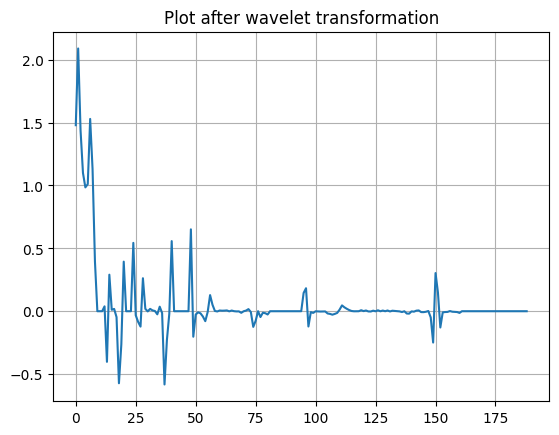

In [77]:
plt.plot(np.arange(189), X_wavelet[0])
plt.grid()
plt.title("Plot after wavelet transformation")
plt.show()

### Standardization of the features

In [57]:
scaler= StandardScaler()

In [58]:
X_transform= scaler.fit_transform(X_wavelet)
X_transform

array([[ 0.34674556,  1.28404677,  0.35890381, ..., -0.02460443,
         0.02171087,  0.        ],
       [-0.82662118, -0.69813915, -0.31584687, ..., -0.02460443,
         0.02171087,  0.        ],
       [-1.21417519, -0.95547781, -0.89041235, ..., -0.02460443,
         0.02171087,  0.        ],
       ...,
       [-0.36968356, -1.53561193, -0.85038617, ..., -0.02460443,
         0.02171087,  0.        ],
       [ 0.66034685, -0.45120678, -0.08744618, ..., -0.02460443,
         0.02171087,  0.        ],
       [-0.62383581, -1.29620816, -1.35170869, ..., -0.02460443,
         0.02171087,  0.        ]])

In [59]:
pd.DataFrame(X_transform).describe()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
count,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,...,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,1.454300e+04,14543.0
mean,-1.860515e-15,-1.602544e-15,-1.825337e-15,-1.954322e-15,-1.594727e-15,-1.438381e-15,-1.067060e-15,-8.599018e-16,-5.472102e-16,-3.009656e-16,...,2.149755e-17,4.885806e-19,-7.328709e-19,-1.954322e-18,1.368026e-17,9.283031e-18,-9.771612e-19,3.908645e-18,4.152935e-18,0.0
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,0.0
min,-1.631624e+00,-1.661102e+00,-1.678823e+00,-1.496639e+00,-1.482846e+00,-1.397175e+00,-1.152370e+00,-7.903879e-01,-4.945623e-01,-3.060944e-01,...,-5.522063e+00,-1.769769e+00,-9.241964e+00,-3.497617e+00,-2.662827e+00,-1.314792e+01,-4.948731e+00,-5.693947e+00,-7.377096e+01,0.0
25%,-7.195494e-01,-7.415886e-01,-7.595803e-01,-7.711505e-01,-7.487116e-01,-7.595599e-01,-8.988458e-01,-7.903879e-01,-4.945623e-01,-3.060944e-01,...,-3.380292e-02,-4.910068e-02,-1.703223e-02,-2.510578e-02,-3.026856e-02,-9.464330e-03,-1.538369e-02,-2.460443e-02,2.171087e-02,0.0
50%,-2.770880e-01,-2.296133e-01,-2.491600e-01,-3.018369e-01,-2.234080e-01,-1.255961e-01,-8.714401e-02,-4.809098e-01,-4.945623e-01,-3.060944e-01,...,-3.380292e-02,-4.910068e-02,-1.703223e-02,-2.510578e-02,-3.026856e-02,-9.464330e-03,-1.538369e-02,-2.460443e-02,2.171087e-02,0.0
75%,4.747128e-01,6.322864e-01,5.588442e-01,5.184239e-01,5.144157e-01,5.331941e-01,6.127837e-01,6.658886e-01,-6.729831e-03,-3.060944e-01,...,-3.380292e-02,-4.910068e-02,-1.703223e-02,-2.510578e-02,-3.026856e-02,-9.464330e-03,-1.538369e-02,-2.460443e-02,2.171087e-02,0.0
max,4.070461e+00,3.405341e+00,3.720488e+00,3.937586e+00,3.691392e+00,4.221687e+00,4.809061e+00,5.410698e+00,7.166256e+00,1.107376e+01,...,3.969609e+01,2.304976e+01,4.929333e+01,4.394681e+01,5.006489e+01,6.971501e+01,7.555236e+01,5.874773e+01,2.171725e+01,0.0


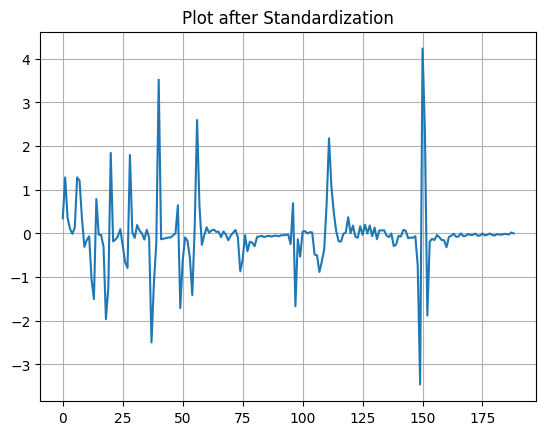

In [76]:
plt.plot(np.arange(189), X_transform[0])
plt.grid()
plt.title("Plot after Standardization")
plt.show()

###Plot before feature reduction

In [ ]:
pca= PCA(n_components=20)
X_pca_transform= pca.fit_transform(X_transform)

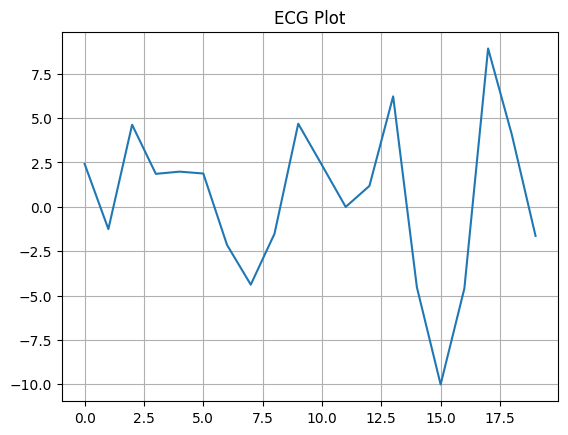

In [ ]:
plt.plot(np.arange(20), X_pca_transform[1])
plt.grid()
plt.title("Plot after PCA transformation")
plt.show()

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X_transform, y, test_size=0.2, random_state=2)

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11634, 189) (2909, 189) (11634,) (2909,)


In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
from xgboost import XGBClassifier

In [68]:
model= XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

In [69]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [70]:
y_pred= model.predict(X_test)

In [71]:
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9914059814369199


In [72]:
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [73]:
print(report)
print(conf_matrix )

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2098
           1       0.99      0.98      0.98       811

    accuracy                           0.99      2909
   macro avg       0.99      0.99      0.99      2909
weighted avg       0.99      0.99      0.99      2909

[[2090    8]
 [  17  794]]


In [74]:
import seaborn as sns

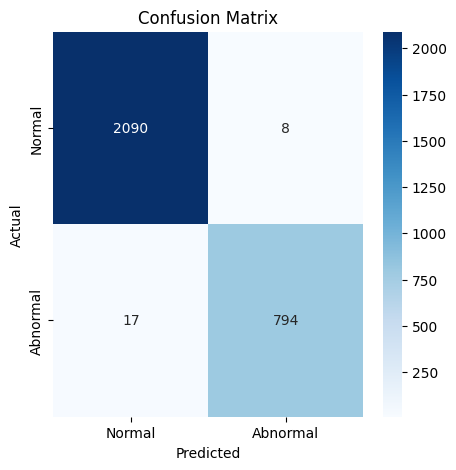

In [75]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()